In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

XGBoost is a random forest that "grows" new trees (estimators) progressively

In [15]:
# import libraries

import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.integrate import odeint, solve_ivp
from scipy.fft import fft


import matplotlib.pylab as plt
import seaborn as sns
import mpl_interactions.ipyplot as iplt
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import Sequence
from tensorflow import keras

import shap as shap
try:
    import lime
    import lime.lime_tabular    
except ImportError:
    pass

%matplotlib inline


import matplotlib
import matplotlib.pyplot as plt

# for reproducibility of this notebook:
rng = np.random.RandomState(42)
#tf.random.set_seed(42)
np.random.seed(42)




In [16]:
# Configurations

Settings=["Base", "Random", "Energy","Gamma"]
Model_types=["True", "Complex", "Simple"]
Param_array = [{'alpha' : 1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}, 
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 1.0, 'beta' : -0.5, 'gamma' : 0.37, 'delta' : 0.0, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}, 
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.5, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.0, 'delta' : 0.3, 'omega' : 0.0},
          {'alpha' : -1.0, 'beta' : -1.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2},
          {'alpha' : 0.0, 'beta' : 0.0, 'gamma' : 0.37, 'delta' : 0.3, 'omega' : 1.2}]

In [17]:
i = 0
j = 1
k = 8

feature_setting = Settings[i]
model_setting = Model_types[j]
params = Param_array[k]

In [58]:
modelXGB = xgb.XGBRegressor(
    n_estimators = 1000000,  # Maximum number of trees (like epochs for neural networks)
    max_depth = 10,  # Maximum tree depth #prev 3
    eta = 0.1,  # Learning rate per tree
    subsample = 0.8,  # Sub-sample of the training set to use for each tree. Recommended [0.7, 1.0]
    )

In [59]:
def compile_and_fit_XGBoost(modelXGB, Xdata, Ydata, validation_split = 0.2,
                            early_stopping_rounds = 10, verbose = True):
    '''
    validation_split: percentage of training data to use for validation and monitor early stopping
    early_stopping_rounds: Minimum number of trees. After that, stop growing the forest if there is no improvement
    '''
    xtrain, xval, ytrain, yval = train_test_split(Xdata, Ydata, 
                                                  test_size = validation_split, random_state = None)
    evalset = [(xtrain, ytrain), (xval, yval)]
    
    modelXGB.fit(xtrain, ytrain, early_stopping_rounds = early_stopping_rounds, 
                 eval_metric='rmse', eval_set=evalset, verbose = verbose)

In [38]:
from Code.BaseDuffing import Duffing

In [39]:
# load dataset

duffing = Duffing(parameters = params)
eom = duffing.eom


features = duffing.features
labels = duffing.labels

# generate some data to train the scaler

end_time = 100
duffing.generate(1000, samples = 50, end_time = end_time)
duffing.scale_features()

#X = pd.DataFrame(duffing.scaler.inverse_transform(big_df[features]), columns = features)
#y = pd.DataFrame(duffing.predict(big_df[features]), columns = labels)

Generating Data…: 100%|██████████████| 10000/10000 [03:37<00:00, 45.99it/s]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(duffing.X_df[features], duffing.X_df['xt'], test_size=0.33, random_state=42)

In [47]:
X = duffing.X_df[features]
y = duffing.X_df['xt']

In [60]:
compile_and_fit_XGBoost(modelXGB, X_train, y_train)

[0]	validation_0-rmse:1.00480	validation_1-rmse:1.00684
[1]	validation_0-rmse:0.91394	validation_1-rmse:0.91587
[2]	validation_0-rmse:0.83218	validation_1-rmse:0.83403
[3]	validation_0-rmse:0.75882	validation_1-rmse:0.76052
[4]	validation_0-rmse:0.69309	validation_1-rmse:0.69469
[5]	validation_0-rmse:0.63321	validation_1-rmse:0.63470
[6]	validation_0-rmse:0.58027	validation_1-rmse:0.58171
[7]	validation_0-rmse:0.53262	validation_1-rmse:0.53402
[8]	validation_0-rmse:0.49028	validation_1-rmse:0.49165
[9]	validation_0-rmse:0.45119	validation_1-rmse:0.45258
[10]	validation_0-rmse:0.41569	validation_1-rmse:0.41696
[11]	validation_0-rmse:0.38557	validation_1-rmse:0.38681
[12]	validation_0-rmse:0.35787	validation_1-rmse:0.35910
[13]	validation_0-rmse:0.33422	validation_1-rmse:0.33561
[14]	validation_0-rmse:0.31188	validation_1-rmse:0.31344
[15]	validation_0-rmse:0.29303	validation_1-rmse:0.29453
[16]	validation_0-rmse:0.27548	validation_1-rmse:0.27705
[17]	validation_0-rmse:0.25977	validation

[144]	validation_0-rmse:0.06972	validation_1-rmse:0.07834
[145]	validation_0-rmse:0.06936	validation_1-rmse:0.07804
[146]	validation_0-rmse:0.06878	validation_1-rmse:0.07755
[147]	validation_0-rmse:0.06839	validation_1-rmse:0.07726
[148]	validation_0-rmse:0.06810	validation_1-rmse:0.07707
[149]	validation_0-rmse:0.06774	validation_1-rmse:0.07673
[150]	validation_0-rmse:0.06758	validation_1-rmse:0.07660
[151]	validation_0-rmse:0.06740	validation_1-rmse:0.07647
[152]	validation_0-rmse:0.06696	validation_1-rmse:0.07610
[153]	validation_0-rmse:0.06644	validation_1-rmse:0.07561
[154]	validation_0-rmse:0.06624	validation_1-rmse:0.07544
[155]	validation_0-rmse:0.06602	validation_1-rmse:0.07523
[156]	validation_0-rmse:0.06567	validation_1-rmse:0.07499
[157]	validation_0-rmse:0.06548	validation_1-rmse:0.07483
[158]	validation_0-rmse:0.06491	validation_1-rmse:0.07436
[159]	validation_0-rmse:0.06484	validation_1-rmse:0.07431
[160]	validation_0-rmse:0.06467	validation_1-rmse:0.07417
[161]	validati

[286]	validation_0-rmse:0.04324	validation_1-rmse:0.05853
[287]	validation_0-rmse:0.04320	validation_1-rmse:0.05851
[288]	validation_0-rmse:0.04302	validation_1-rmse:0.05840
[289]	validation_0-rmse:0.04290	validation_1-rmse:0.05832
[290]	validation_0-rmse:0.04285	validation_1-rmse:0.05829
[291]	validation_0-rmse:0.04278	validation_1-rmse:0.05826
[292]	validation_0-rmse:0.04272	validation_1-rmse:0.05823
[293]	validation_0-rmse:0.04265	validation_1-rmse:0.05818
[294]	validation_0-rmse:0.04257	validation_1-rmse:0.05814
[295]	validation_0-rmse:0.04250	validation_1-rmse:0.05808
[296]	validation_0-rmse:0.04240	validation_1-rmse:0.05801
[297]	validation_0-rmse:0.04235	validation_1-rmse:0.05798
[298]	validation_0-rmse:0.04228	validation_1-rmse:0.05794
[299]	validation_0-rmse:0.04223	validation_1-rmse:0.05791
[300]	validation_0-rmse:0.04220	validation_1-rmse:0.05790
[301]	validation_0-rmse:0.04200	validation_1-rmse:0.05777
[302]	validation_0-rmse:0.04194	validation_1-rmse:0.05774
[303]	validati

[428]	validation_0-rmse:0.03236	validation_1-rmse:0.05261
[429]	validation_0-rmse:0.03231	validation_1-rmse:0.05259
[430]	validation_0-rmse:0.03226	validation_1-rmse:0.05257
[431]	validation_0-rmse:0.03221	validation_1-rmse:0.05255
[432]	validation_0-rmse:0.03215	validation_1-rmse:0.05251
[433]	validation_0-rmse:0.03210	validation_1-rmse:0.05249
[434]	validation_0-rmse:0.03206	validation_1-rmse:0.05247
[435]	validation_0-rmse:0.03203	validation_1-rmse:0.05245
[436]	validation_0-rmse:0.03200	validation_1-rmse:0.05244
[437]	validation_0-rmse:0.03198	validation_1-rmse:0.05243
[438]	validation_0-rmse:0.03195	validation_1-rmse:0.05243
[439]	validation_0-rmse:0.03188	validation_1-rmse:0.05240
[440]	validation_0-rmse:0.03181	validation_1-rmse:0.05237
[441]	validation_0-rmse:0.03176	validation_1-rmse:0.05234
[442]	validation_0-rmse:0.03172	validation_1-rmse:0.05232
[443]	validation_0-rmse:0.03166	validation_1-rmse:0.05228
[444]	validation_0-rmse:0.03163	validation_1-rmse:0.05227
[445]	validati

[570]	validation_0-rmse:0.02641	validation_1-rmse:0.05019
[571]	validation_0-rmse:0.02635	validation_1-rmse:0.05016
[572]	validation_0-rmse:0.02631	validation_1-rmse:0.05015
[573]	validation_0-rmse:0.02625	validation_1-rmse:0.05013
[574]	validation_0-rmse:0.02622	validation_1-rmse:0.05013
[575]	validation_0-rmse:0.02615	validation_1-rmse:0.05009
[576]	validation_0-rmse:0.02613	validation_1-rmse:0.05008
[577]	validation_0-rmse:0.02610	validation_1-rmse:0.05008
[578]	validation_0-rmse:0.02606	validation_1-rmse:0.05007
[579]	validation_0-rmse:0.02602	validation_1-rmse:0.05005
[580]	validation_0-rmse:0.02600	validation_1-rmse:0.05004
[581]	validation_0-rmse:0.02595	validation_1-rmse:0.05002
[582]	validation_0-rmse:0.02591	validation_1-rmse:0.05000
[583]	validation_0-rmse:0.02588	validation_1-rmse:0.04999
[584]	validation_0-rmse:0.02585	validation_1-rmse:0.04999
[585]	validation_0-rmse:0.02583	validation_1-rmse:0.04997
[586]	validation_0-rmse:0.02577	validation_1-rmse:0.04995
[587]	validati

[712]	validation_0-rmse:0.02181	validation_1-rmse:0.04872
[713]	validation_0-rmse:0.02178	validation_1-rmse:0.04870
[714]	validation_0-rmse:0.02175	validation_1-rmse:0.04869
[715]	validation_0-rmse:0.02170	validation_1-rmse:0.04867
[716]	validation_0-rmse:0.02166	validation_1-rmse:0.04866
[717]	validation_0-rmse:0.02165	validation_1-rmse:0.04866
[718]	validation_0-rmse:0.02163	validation_1-rmse:0.04865
[719]	validation_0-rmse:0.02161	validation_1-rmse:0.04865
[720]	validation_0-rmse:0.02158	validation_1-rmse:0.04864
[721]	validation_0-rmse:0.02155	validation_1-rmse:0.04864
[722]	validation_0-rmse:0.02154	validation_1-rmse:0.04864
[723]	validation_0-rmse:0.02150	validation_1-rmse:0.04863
[724]	validation_0-rmse:0.02148	validation_1-rmse:0.04862
[725]	validation_0-rmse:0.02146	validation_1-rmse:0.04863
[726]	validation_0-rmse:0.02143	validation_1-rmse:0.04861
[727]	validation_0-rmse:0.02141	validation_1-rmse:0.04861
[728]	validation_0-rmse:0.02138	validation_1-rmse:0.04859
[729]	validati

[854]	validation_0-rmse:0.01860	validation_1-rmse:0.04785
[855]	validation_0-rmse:0.01859	validation_1-rmse:0.04785
[856]	validation_0-rmse:0.01857	validation_1-rmse:0.04784
[857]	validation_0-rmse:0.01856	validation_1-rmse:0.04784
[858]	validation_0-rmse:0.01853	validation_1-rmse:0.04783
[859]	validation_0-rmse:0.01850	validation_1-rmse:0.04782
[860]	validation_0-rmse:0.01848	validation_1-rmse:0.04781
[861]	validation_0-rmse:0.01844	validation_1-rmse:0.04781
[862]	validation_0-rmse:0.01843	validation_1-rmse:0.04780
[863]	validation_0-rmse:0.01842	validation_1-rmse:0.04780
[864]	validation_0-rmse:0.01839	validation_1-rmse:0.04780
[865]	validation_0-rmse:0.01837	validation_1-rmse:0.04779
[866]	validation_0-rmse:0.01836	validation_1-rmse:0.04779
[867]	validation_0-rmse:0.01834	validation_1-rmse:0.04778
[868]	validation_0-rmse:0.01833	validation_1-rmse:0.04778
[869]	validation_0-rmse:0.01831	validation_1-rmse:0.04779
[870]	validation_0-rmse:0.01830	validation_1-rmse:0.04778
[871]	validati

[996]	validation_0-rmse:0.01608	validation_1-rmse:0.04728
[997]	validation_0-rmse:0.01607	validation_1-rmse:0.04728
[998]	validation_0-rmse:0.01605	validation_1-rmse:0.04727
[999]	validation_0-rmse:0.01604	validation_1-rmse:0.04727
[1000]	validation_0-rmse:0.01603	validation_1-rmse:0.04727
[1001]	validation_0-rmse:0.01599	validation_1-rmse:0.04726
[1002]	validation_0-rmse:0.01599	validation_1-rmse:0.04726
[1003]	validation_0-rmse:0.01597	validation_1-rmse:0.04726
[1004]	validation_0-rmse:0.01597	validation_1-rmse:0.04726
[1005]	validation_0-rmse:0.01596	validation_1-rmse:0.04726
[1006]	validation_0-rmse:0.01594	validation_1-rmse:0.04726
[1007]	validation_0-rmse:0.01593	validation_1-rmse:0.04726
[1008]	validation_0-rmse:0.01592	validation_1-rmse:0.04725
[1009]	validation_0-rmse:0.01590	validation_1-rmse:0.04725
[1010]	validation_0-rmse:0.01589	validation_1-rmse:0.04725
[1011]	validation_0-rmse:0.01588	validation_1-rmse:0.04724
[1012]	validation_0-rmse:0.01587	validation_1-rmse:0.04724
[

[1135]	validation_0-rmse:0.01406	validation_1-rmse:0.04683
[1136]	validation_0-rmse:0.01405	validation_1-rmse:0.04683
[1137]	validation_0-rmse:0.01404	validation_1-rmse:0.04683
[1138]	validation_0-rmse:0.01402	validation_1-rmse:0.04682
[1139]	validation_0-rmse:0.01400	validation_1-rmse:0.04681
[1140]	validation_0-rmse:0.01399	validation_1-rmse:0.04681
[1141]	validation_0-rmse:0.01398	validation_1-rmse:0.04681
[1142]	validation_0-rmse:0.01397	validation_1-rmse:0.04681
[1143]	validation_0-rmse:0.01396	validation_1-rmse:0.04681
[1144]	validation_0-rmse:0.01395	validation_1-rmse:0.04681
[1145]	validation_0-rmse:0.01394	validation_1-rmse:0.04681
[1146]	validation_0-rmse:0.01393	validation_1-rmse:0.04681
[1147]	validation_0-rmse:0.01392	validation_1-rmse:0.04680
[1148]	validation_0-rmse:0.01390	validation_1-rmse:0.04680
[1149]	validation_0-rmse:0.01389	validation_1-rmse:0.04680
[1150]	validation_0-rmse:0.01388	validation_1-rmse:0.04680
[1151]	validation_0-rmse:0.01388	validation_1-rmse:0.046

[1274]	validation_0-rmse:0.01238	validation_1-rmse:0.04655
[1275]	validation_0-rmse:0.01238	validation_1-rmse:0.04655
[1276]	validation_0-rmse:0.01237	validation_1-rmse:0.04655
[1277]	validation_0-rmse:0.01236	validation_1-rmse:0.04655
[1278]	validation_0-rmse:0.01236	validation_1-rmse:0.04655
[1279]	validation_0-rmse:0.01235	validation_1-rmse:0.04654
[1280]	validation_0-rmse:0.01233	validation_1-rmse:0.04655
[1281]	validation_0-rmse:0.01232	validation_1-rmse:0.04654
[1282]	validation_0-rmse:0.01231	validation_1-rmse:0.04654
[1283]	validation_0-rmse:0.01230	validation_1-rmse:0.04654
[1284]	validation_0-rmse:0.01230	validation_1-rmse:0.04654
[1285]	validation_0-rmse:0.01229	validation_1-rmse:0.04654
[1286]	validation_0-rmse:0.01229	validation_1-rmse:0.04654
[1287]	validation_0-rmse:0.01228	validation_1-rmse:0.04654
[1288]	validation_0-rmse:0.01227	validation_1-rmse:0.04654
[1289]	validation_0-rmse:0.01226	validation_1-rmse:0.04654
[1290]	validation_0-rmse:0.01225	validation_1-rmse:0.046

In [61]:
pred = modelXGB.predict(X_test)
print('rmse = ', np.sqrt(np.mean((y_test-pred)**2)))

rmse =  0.04578240132847028


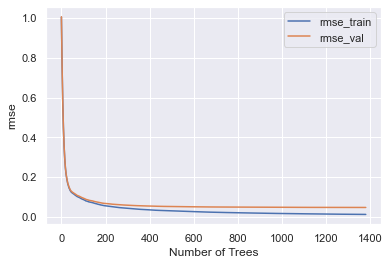

In [62]:
learning_curve = modelXGB.evals_result()
fig, ax = plt.subplots()
ax.plot(learning_curve['validation_0']['rmse'])
ax.plot(learning_curve['validation_1']['rmse'])
plt.legend(['rmse_train', 'rmse_val'])
ax.set_xlabel('Number of Trees')
ax.set_ylabel('rmse')
ax.tick_params(axis = 'both')
plt.show()

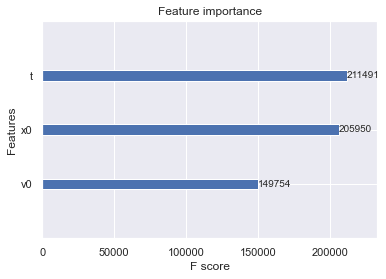

{'v0': 149754, 'x0': 205950, 't': 211491}


In [63]:
xgb.plot_importance(modelXGB)
plt.show()

print(modelXGB.get_booster().get_score())